#**REAL-TIME ELECTION RESULTS: PORTUGAL 2019**

*Autor: Alejandra Elizabeth Moreno Morales*

La política en Portugal opera como una república democrática representativa semipresidencial, multipartidaria y unitaria, en la que el Primer Ministro de Portugal es el jefe de gobierno y el Presidente de Portugal es el jefe de estado no ejecutivo, con varios poderes políticos importantes que ejercen a menudo. .[1] El poder ejecutivo lo ejerce el Gobierno, cuyo líder es el Primer Ministro. El poder legislativo reside principalmente en la Asamblea de la República (el parlamento portugués), aunque el gobierno también puede legislar sobre determinadas materias.[2] El poder judicial de Portugal es independiente del ejecutivo y del legislativo. El Presidente ejerce una especie de "poder moderador", que no se puede clasificar fácilmente en ninguno de los tres poderes tradicionales del gobierno.[1]

Los gobiernos nacional y regional están dominados por dos partidos políticos, el Partido Socialista (PS), de centro izquierda, un partido socialdemócrata, y el Partido Socialdemócrata (PSD), de centro derecha y liberal-conservador.

 Otros partidos con escaños en el parlamento son Chega, el Partido Comunista Portugués, el Bloque de Izquierda, el Partido Ecologista "Los Verdes", LIVRE y Personas-Animales-Naturaleza. Los comunistas y los verdes están en coalición como Coalición Democrática Unitaria.

Referencia: https://en.wikipedia.org/wiki/Politics_of_Portugal

Las variables en el conjunto de datos utilizadas: -

1. TimeElapsed (numeric): Tiempo (minutos) transcurrido desde la primera adquisición de datos
2. time (timestamp): fecha y hora de la adquisición de datos
3. territoryName (string): nombre corto de la ubicación (distrito o a nivel nacional)
4. totalMandates (numeric): diputados elegidos en este momento
5. availableMandates (numeric): quedan parlamentarios para elegir en este momento
6. numParishes (numeric): número total de parroquias en esta ubicación
7. numParishesApproved (numeric): Número de parroquias aprobadas en esta ubicación
8. BlankVotes (numeric): Número de votos en blanco.
9. whiteVotesPercentage (numeric): Porcentaje de votos en blanco
10. nullVotes (numeric): Número de votos nulos
11. nullVotesPercentage (numeric): Porcentaje de votos nulos
12. votantesPercentage (numeric): Porcentaje de votantes
13. subscribedVoters (numeric): número de votantes suscritos en la ubicación
14. totalVoters (numeric): Porcentaje de votos en blanco
15. pre.blankVotes (numeric): Número de votos en blanco (elección anterior)
16. pre.blankVotesPercentage (numeric): Porcentaje de votos en blanco (elección anterior)
17. pre.nullVotes (numeric): Número de votos nulos (elección anterior)
18. pre.nullVotesPercentage (numeric): Porcentaje de votos nulos (elección anterior)
19. pre.votersPercentage (numeric): Porcentaje de votantes (elección anterior)
20. pre.subscribedVoters (numeric): Número de votantes suscritos en la ubicación (elección anterior)
21. pre.totalVoters (numeric): Porcentaje de votos en blanco (elección anterior)
22. Party (string): Partido Político
23. Mandates (numeric): diputados elegidos en ese momento para el partido en un distrito determinado
24. Percentage (numeric): Porcentaje de votos en un partido
25. validVotesPercentage (numeric): Porcentaje de votos válidos en un partido
26. Votes (numeric): Porcentaje de votos del partido
27. Hondt (numeric): Número de diputados según la distribución de votos actual
28. FinalMandates  (numeric): Objetivo: número final de parlamentarios electos a nivel de distrito/nacional

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

##**ANÁLISIS EXPLORATORIO**

## **Descarga de Dataset**

In [37]:
data_fname = "ElectionData.csv"

df_data = pd.read_csv(data_fname)

## **Inspección de datos**

In [38]:
df_data.head(5)

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [39]:
## Tamaño del conjunto de datos
df_data.shape

(21643, 28)

In [40]:
## Tipos de datos por columna
df_data.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

In [41]:
## Estadísticas descriptivas (tendencia central, la dispersión y la distribución del conjunto de datos, excluyendo valores NaN)
df_data.describe()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,...,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,133.146052,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,...,1.777442,54.549372,6.378503e+05,3.594932e+05,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,77.651193,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,...,0.388798,4.964948,1.544418e+06,8.763729e+05,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,...,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,65.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,...,1.520000,51.210000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,135.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,...,1.690000,56.260000,2.284970e+05,1.102730e+05,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,200.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,...,1.970000,58.220000,3.933140e+05,2.276200e+05,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,265.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,...,3.120000,62.580000,9.439701e+06,5.380451e+06,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


## **Análisis de los datos**

### Histograma de distribución de las variables

array([[<Axes: title={'center': 'TimeElapsed'}>,
        <Axes: title={'center': 'totalMandates'}>,
        <Axes: title={'center': 'availableMandates'}>,
        <Axes: title={'center': 'numParishes'}>,
        <Axes: title={'center': 'numParishesApproved'}>],
       [<Axes: title={'center': 'blankVotes'}>,
        <Axes: title={'center': 'blankVotesPercentage'}>,
        <Axes: title={'center': 'nullVotes'}>,
        <Axes: title={'center': 'nullVotesPercentage'}>,
        <Axes: title={'center': 'votersPercentage'}>],
       [<Axes: title={'center': 'subscribedVoters'}>,
        <Axes: title={'center': 'totalVoters'}>,
        <Axes: title={'center': 'pre.blankVotes'}>,
        <Axes: title={'center': 'pre.blankVotesPercentage'}>,
        <Axes: title={'center': 'pre.nullVotes'}>],
       [<Axes: title={'center': 'pre.nullVotesPercentage'}>,
        <Axes: title={'center': 'pre.votersPercentage'}>,
        <Axes: title={'center': 'pre.subscribedVoters'}>,
        <Axes: title={'cent

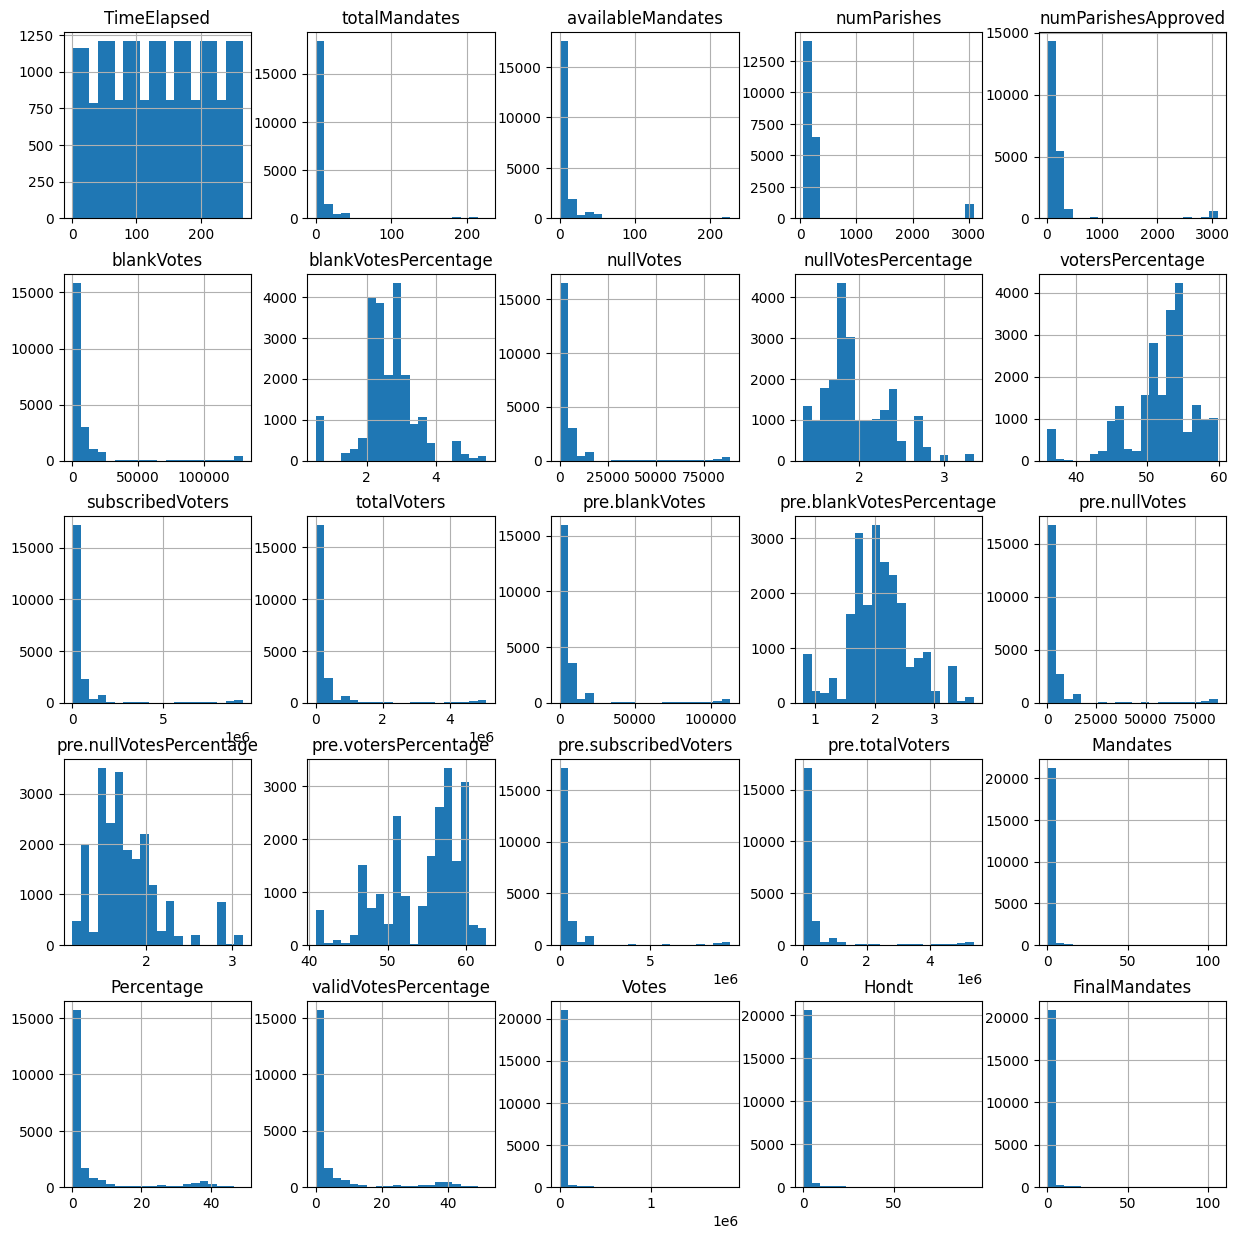

In [42]:
df_data.hist(figsize=(15,15), layout=(5,5), bins=20)

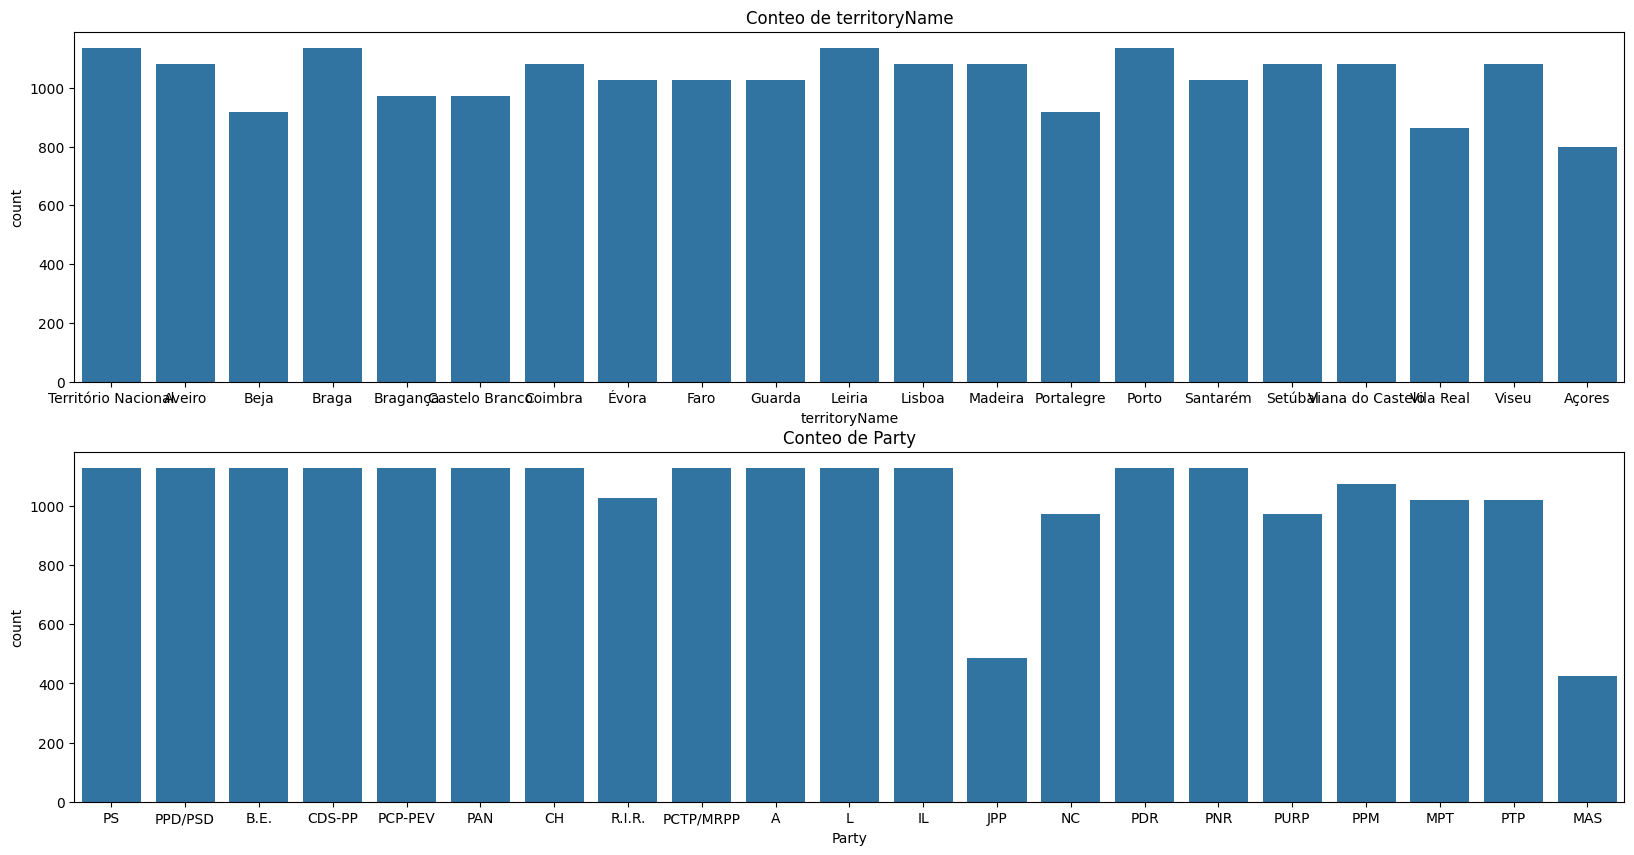

In [43]:
## Distribución de datos de variables principales 'Territorios (distritos)' y 'Partidos politicos'
vars_ = ["territoryName", "Party"]

fig,axes=plt.subplots(nrows=2,ncols=1,figsize=[20,10])
for i in range(0,len(vars_)):
    axes[i]=sns.countplot(x = vars_[i],data = df_data,ax=axes[i])
    axes[i].set_title("Conteo de "+vars_[i])

Se observa una distribución uniforme en los datos de territorio (distrito) siendo el de menos datos, el territorio de Acores.
La distribución de dato de los partidos politicos no es tan uniforme pues se observan valores menores en los partidos de JPP y MAS.

### Relación de las variables principales: Territorio (distrito) y partido politico

In [50]:
cross_reltable=pd.crosstab(df_data['territoryName'],df_data['Party'])
cross_reltable

Party,A,B.E.,CDS-PP,CH,IL,JPP,L,MAS,MPT,NC,...,PCP-PEV,PCTP/MRPP,PDR,PNR,PPD/PSD,PPM,PS,PTP,PURP,R.I.R.
territoryName,,,,,,,,,,,,,,,,,,,,,
Aveiro,54,54,54,54,54,54,54,0,54,54,...,54,54,54,54,54,54,54,54,54,54
Açores,47,47,47,47,47,0,47,47,47,0,...,47,47,47,47,47,47,47,47,0,0
Beja,54,54,54,54,54,0,54,0,54,54,...,54,54,54,54,54,54,54,54,0,0
Braga,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54
Bragança,54,54,54,54,54,0,54,0,0,54,...,54,54,54,54,54,54,54,54,54,54
Castelo Branco,54,54,54,54,54,0,54,0,54,0,...,54,54,54,54,54,54,54,54,54,54
Coimbra,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,0,54,54
Faro,54,54,54,54,54,0,54,0,54,54,...,54,54,54,54,54,54,54,54,54,54
Guarda,54,54,54,54,54,0,54,0,54,54,...,54,54,54,54,54,54,54,54,54,54


<Axes: xlabel='Party'>

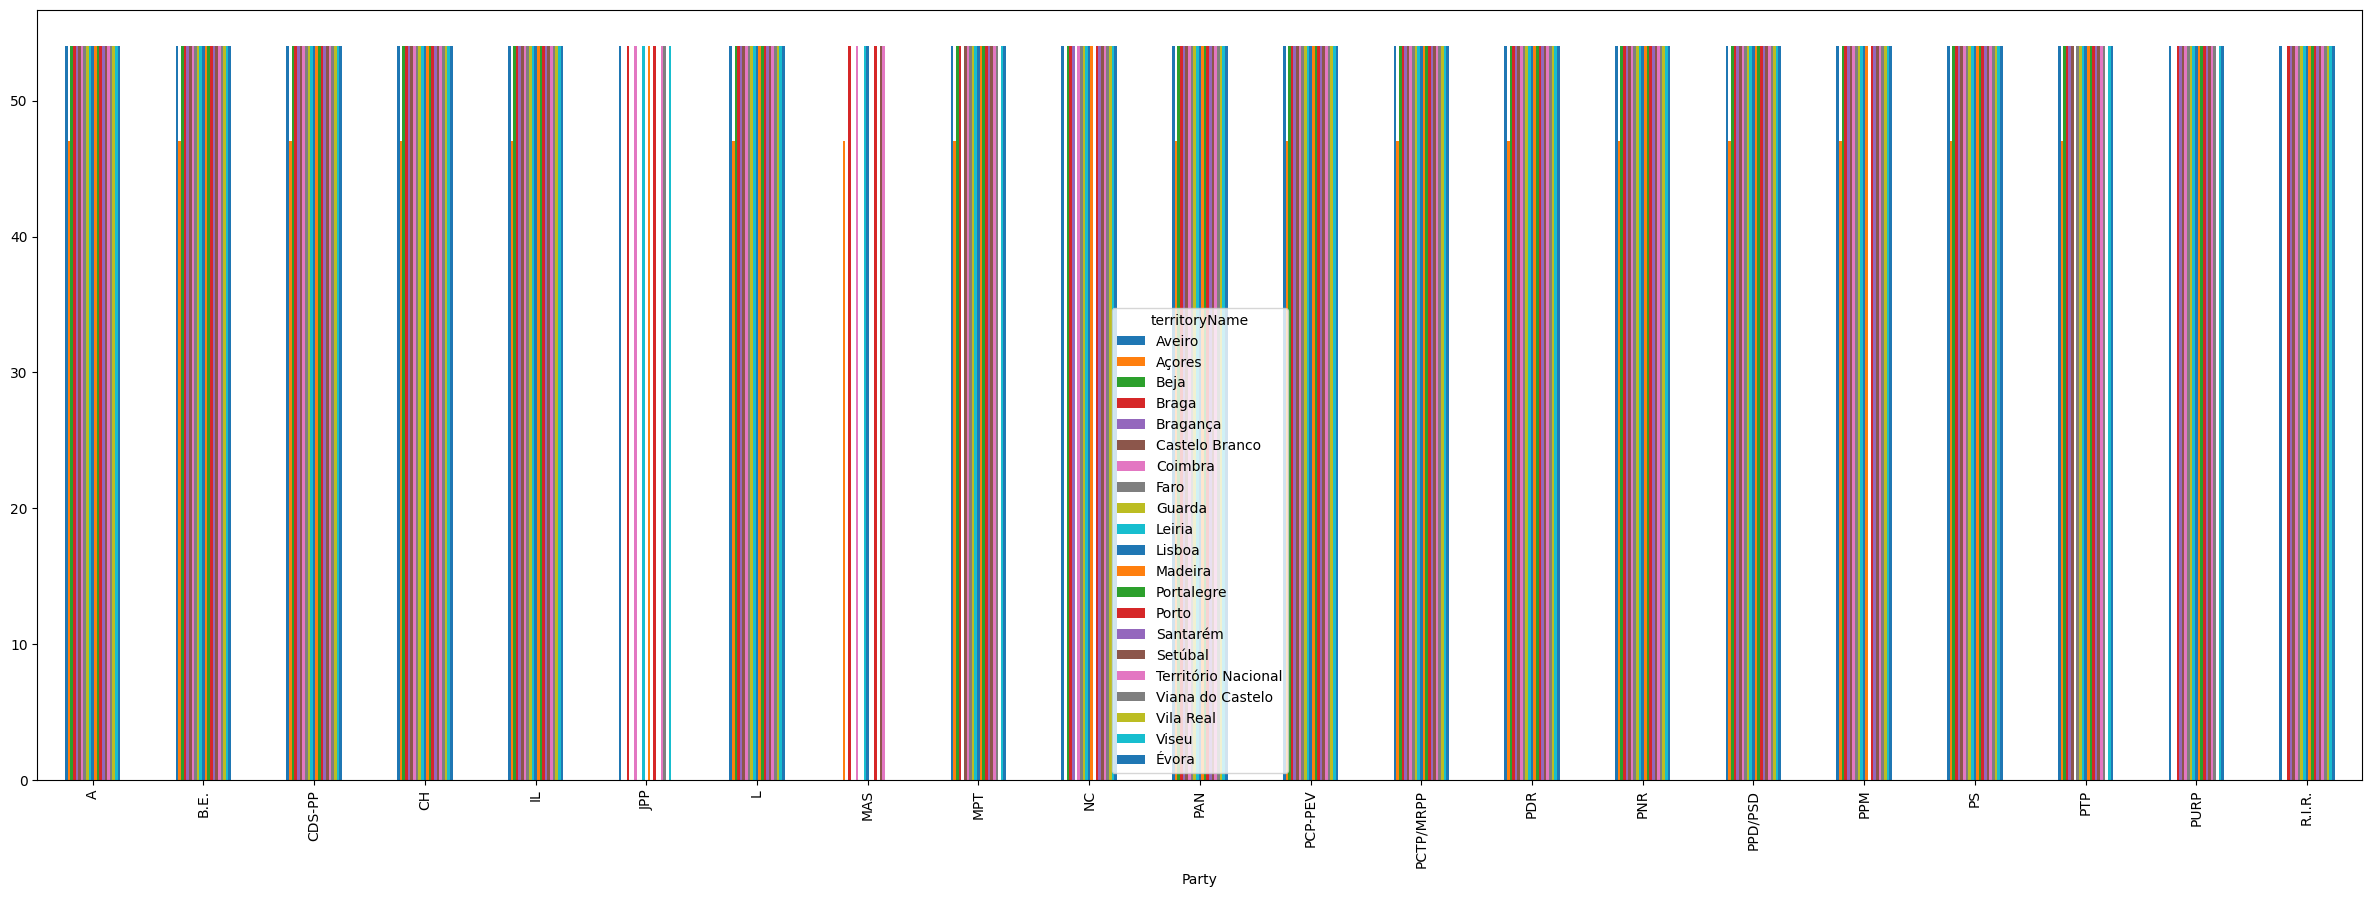

In [51]:
cross_reltable.T.plot(kind='bar',figsize=(30,10))

In [52]:
## Número de parlamentarios electos por partido
pd.pivot_table(df_data,index ='Party', values = 'FinalMandates',aggfunc=np.mean).sort_values('FinalMandates', ascending = False)

,FinalMandates
Party,
PS,10.139308
PPD/PSD,7.366460
B.E.,1.820763
PCP-PEV,1.149956
CDS-PP,0.479148
PAN,0.383319
CH,0.095830
IL,0.095830
L,0.095830


Se observan que destacan los partidos 'PS' y 'PPD/PSD' en número de candidatos electos

In [53]:
## Votos validos por partido
pd.pivot_table(df_data, index ='Party' ,values = 'validVotesPercentage').sort_values('validVotesPercentage',ascending=False)

,validVotesPercentage
Party,
PS,39.513789
PPD/PSD,30.498900
B.E.,8.941145
PCP-PEV,6.982227
CDS-PP,4.674836
PAN,2.544020
CH,1.362236
PCTP/MRPP,0.780195
R.I.R.,0.763733


Se observa que el partido 'PS' obtiene un porcentaje más alto de votos válidos, mientas que el partido 'MAS' obtiene el menor porcentaje de votos válidos

In [54]:
## Votos núlos por partido
pd.pivot_table(df_data, index ='Party' ,values = 'nullVotesPercentage').sort_values('nullVotesPercentage',ascending=False)

,nullVotesPercentage
Party,
R.I.R.,1.995624
PURP,1.970031
PPM,1.967875
B.E.,1.965741
PS,1.965741
PPD/PSD,1.965741
PNR,1.965741
PDR,1.965741
PCTP/MRPP,1.965741


Se observa consistencia en el porcentaje de votos nulos entre los partidos

In [55]:
## Votos en blanco por partido
pd.pivot_table(df_data, index ='Party' ,values = 'blankVotesPercentage').sort_values('blankVotesPercentage',ascending=False)

,blankVotesPercentage
Party,
MAS,3.033035
JPP,2.710329
MPT,2.671384
PPM,2.638211
A,2.618181
PCP-PEV,2.618181
PS,2.618181
PPD/PSD,2.618181
PNR,2.618181


Se observa que el partido 'MAS' tiene un porcentaje de votos en blanco más alto; mientras que los demás partidos se mantienen un tanto constantes

##**Tratamiento de datos**

### Valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

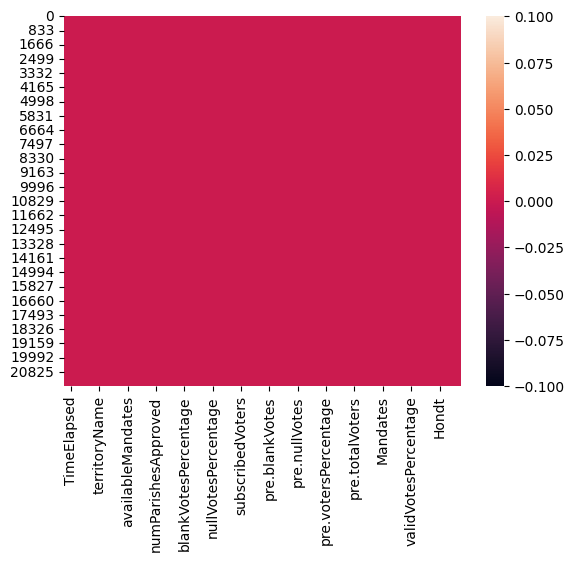

In [56]:
## Exploración datos nulos en columnas
df_data.info()

sns.heatmap(df_data.isnull())
plt.show()

*No se observan valores nulos en ninguno de los campos*

### Variables estrechamente relacionadas. Reducción de dimensionalidad

<ipython-input-57-701366eb3086>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_data.corr()


<Axes: >

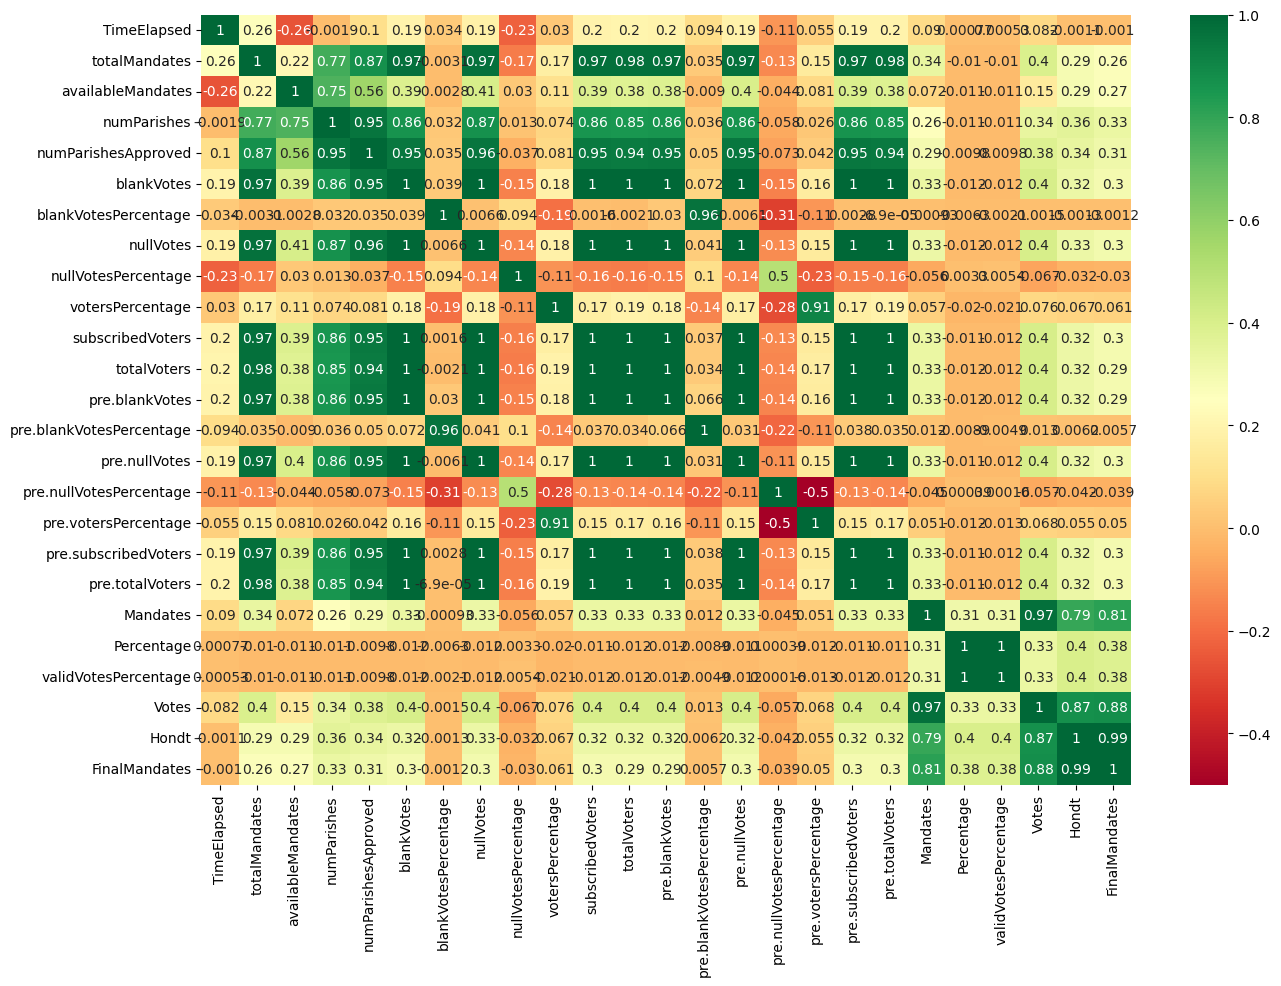

In [57]:
## Visualización de correlación de las variables númericas
corr = df_data.corr()
corr_features = corr.index
plt.figure(figsize=(15,10))
sns.heatmap(df_data[corr_features].corr(),cmap="RdYlGn",annot=True)

*Se observa intensidad de relación lineal entre las variables. Existen variables con coeficiente de correlación mayor al 0.90.
se unificarán estas variables en un solo valor para reducir dimensionalidad.*

In [58]:
## Usando la función de StandarScaler de la libreria de preprocesamiento de Sklearn y la función PCA del conjunto de descomposición, se realizará el proceso de escalamiento y estandarización de las variables correlacionadas para posteriormente unificarla en una sola variable

## Variables correlacionadas
corr_vars=['totalMandates','numParishesApproved','blankVotes','nullVotes','subscribedVoters','totalVoters','pre.blankVotes','pre.nullVotes','pre.subscribedVoters','pre.totalVoters','Percentage','Mandates','pre.blankVotesPercentage','pre.votersPercentage']

# Escalamiento
df1 = df_data[corr_vars]

# Estandarización y transformación a distribución normal
sc = StandardScaler()
fit_df = sc.fit_transform(df1)
df_1 = pd.DataFrame(fit_df,columns=df1.columns)

# Unificación
pca = PCA(n_components=1)
new_var1 = pca.fit_transform(df_1)

# Actualización del conjunto de datos
df_data_reduced = pd.concat((df_data, pd.DataFrame(new_var1)), axis=1)
df_data_reduced.rename({0: 'grp_corrvars'}, axis=1, inplace = True)
df_data_reduced.drop(corr_vars, axis=1, inplace=True)
df_data = df_data_reduced
df_data.head(5)

,TimeElapsed,time,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,FinalMandates,grp_corrvars
0,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PS,40.22,147993,94,106,0.508012
1,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PPD/PSD,34.95,128624,81,77,0.508034
2,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,B.E.,7.15,26307,16,19,0.508147
3,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,CDS-PP,5.14,18923,12,5,0.508155
4,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PCP-PEV,4.83,17757,11,12,0.508156


### Variables categoricas

In [59]:
## Conversión de tipo de datos
#df_data["time"] = df_data["time"].astype(np.datetime64)

In [60]:
## Haciendo uso de la función LabelEncoder de la libreria de preprocesamiento de Skelearn, transformaremos las variables categoricas a númericas
categorical_vars =[]
for i in df_data.columns:
    if df_data[i].dtypes=="O":
        categorical_vars.append(i)

print("Las variables categoricas son:", categorical_vars)

le = LabelEncoder()

for i in categorical_vars:
    df_data[i]=pd.DataFrame(le.fit_transform(df_data[i]))


df_data.head(5)
print (df_data.info())

Las variables categoricas son: ['time', 'territoryName', 'Party']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TimeElapsed              21643 non-null  int64  
 1   time                     21643 non-null  int64  
 2   territoryName            21643 non-null  int64  
 3   availableMandates        21643 non-null  int64  
 4   numParishes              21643 non-null  int64  
 5   blankVotesPercentage     21643 non-null  float64
 6   nullVotesPercentage      21643 non-null  float64
 7   votersPercentage         21643 non-null  float64
 8   pre.nullVotesPercentage  21643 non-null  float64
 9   Party                    21643 non-null  int64  
 10  validVotesPercentage     21643 non-null  float64
 11  Votes                    21643 non-null  int64  
 12  Hondt                    21643 non-null  int64  
 13  FinalManda

In [61]:
df_data.head(5)

,TimeElapsed,time,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,FinalMandates,grp_corrvars
0,0,0,16,226,3092,2.5,2.3,51.36,1.91,17,40.22,147993,94,106,0.508012
1,0,0,16,226,3092,2.5,2.3,51.36,1.91,15,34.95,128624,81,77,0.508034
2,0,0,16,226,3092,2.5,2.3,51.36,1.91,1,7.15,26307,16,19,0.508147
3,0,0,16,226,3092,2.5,2.3,51.36,1.91,2,5.14,18923,12,5,0.508155
4,0,0,16,226,3092,2.5,2.3,51.36,1.91,11,4.83,17757,11,12,0.508156


In [62]:
print("Tamaño del conjunto de datos:", df_data.shape)

Tamaño del conjunto de datos: (21643, 15)


### Valores atipicos

TimeElapsed                   Axes(0.125,0.747241;0.133621x0.132759)
time                       Axes(0.285345,0.747241;0.133621x0.132759)
territoryName               Axes(0.44569,0.747241;0.133621x0.132759)
availableMandates          Axes(0.606034,0.747241;0.133621x0.132759)
numParishes                Axes(0.766379,0.747241;0.133621x0.132759)
blankVotesPercentage          Axes(0.125,0.587931;0.133621x0.132759)
nullVotesPercentage        Axes(0.285345,0.587931;0.133621x0.132759)
votersPercentage            Axes(0.44569,0.587931;0.133621x0.132759)
pre.nullVotesPercentage    Axes(0.606034,0.587931;0.133621x0.132759)
Party                      Axes(0.766379,0.587931;0.133621x0.132759)
validVotesPercentage          Axes(0.125,0.428621;0.133621x0.132759)
Votes                      Axes(0.285345,0.428621;0.133621x0.132759)
Hondt                       Axes(0.44569,0.428621;0.133621x0.132759)
FinalMandates              Axes(0.606034,0.428621;0.133621x0.132759)
grp_corrvars               Axes(0.

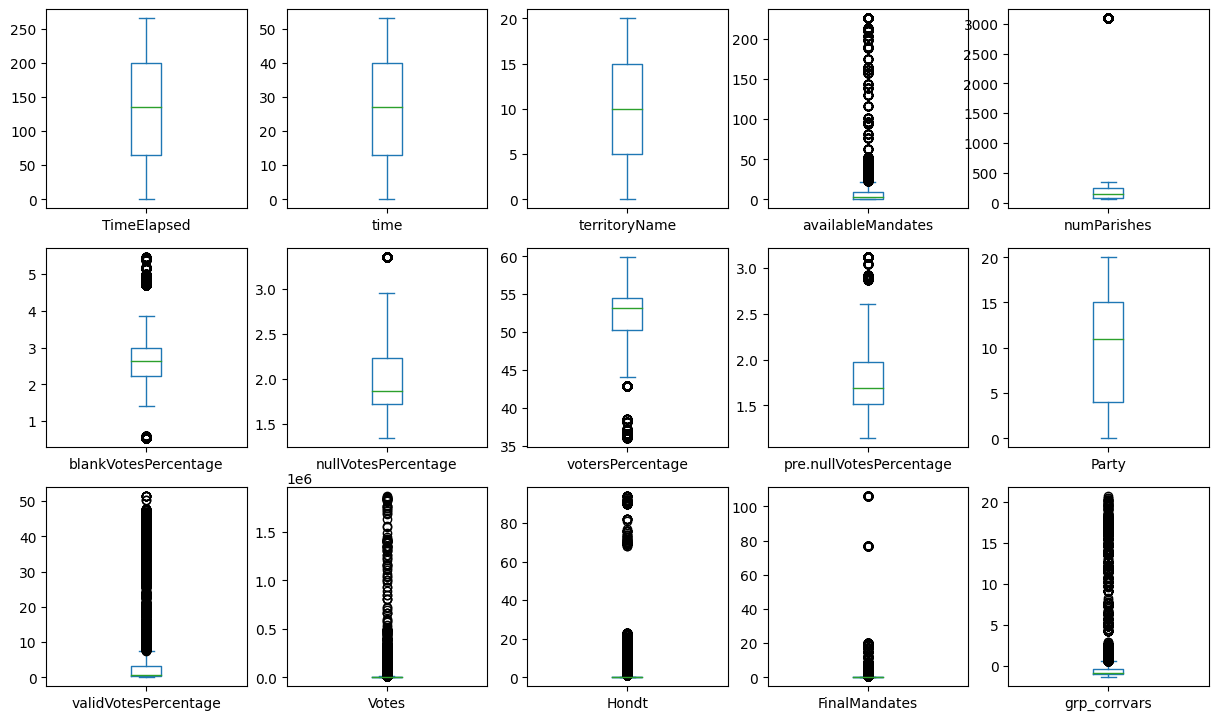

In [63]:
## Exploración y detección de valores atipicos entre las variables
df_data.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

*Se observan valores atipicos en algunas variables*

In [64]:
## Tratamiento de valores atípicos
## Usando el indicador z-score definiremos un limite 3 para descartar los valores fuera de este rango en su desviación estandar
z = np.abs(zscore(df_data))
threshold = 3

#Entradas con z-score menor a 3
zscore_menores= (z < 3).all(axis=1)
df_data2 = df_data[zscore_menores]

#Eliminación de valores atipicos
df_data2 = df_data[(z<3).all(axis = 1)]
df_data = df_data2


TimeElapsed                   Axes(0.125,0.747241;0.133621x0.132759)
time                       Axes(0.285345,0.747241;0.133621x0.132759)
territoryName               Axes(0.44569,0.747241;0.133621x0.132759)
availableMandates          Axes(0.606034,0.747241;0.133621x0.132759)
numParishes                Axes(0.766379,0.747241;0.133621x0.132759)
blankVotesPercentage          Axes(0.125,0.587931;0.133621x0.132759)
nullVotesPercentage        Axes(0.285345,0.587931;0.133621x0.132759)
votersPercentage            Axes(0.44569,0.587931;0.133621x0.132759)
pre.nullVotesPercentage    Axes(0.606034,0.587931;0.133621x0.132759)
Party                      Axes(0.766379,0.587931;0.133621x0.132759)
validVotesPercentage          Axes(0.125,0.428621;0.133621x0.132759)
Votes                      Axes(0.285345,0.428621;0.133621x0.132759)
Hondt                       Axes(0.44569,0.428621;0.133621x0.132759)
FinalMandates              Axes(0.606034,0.428621;0.133621x0.132759)
grp_corrvars               Axes(0.

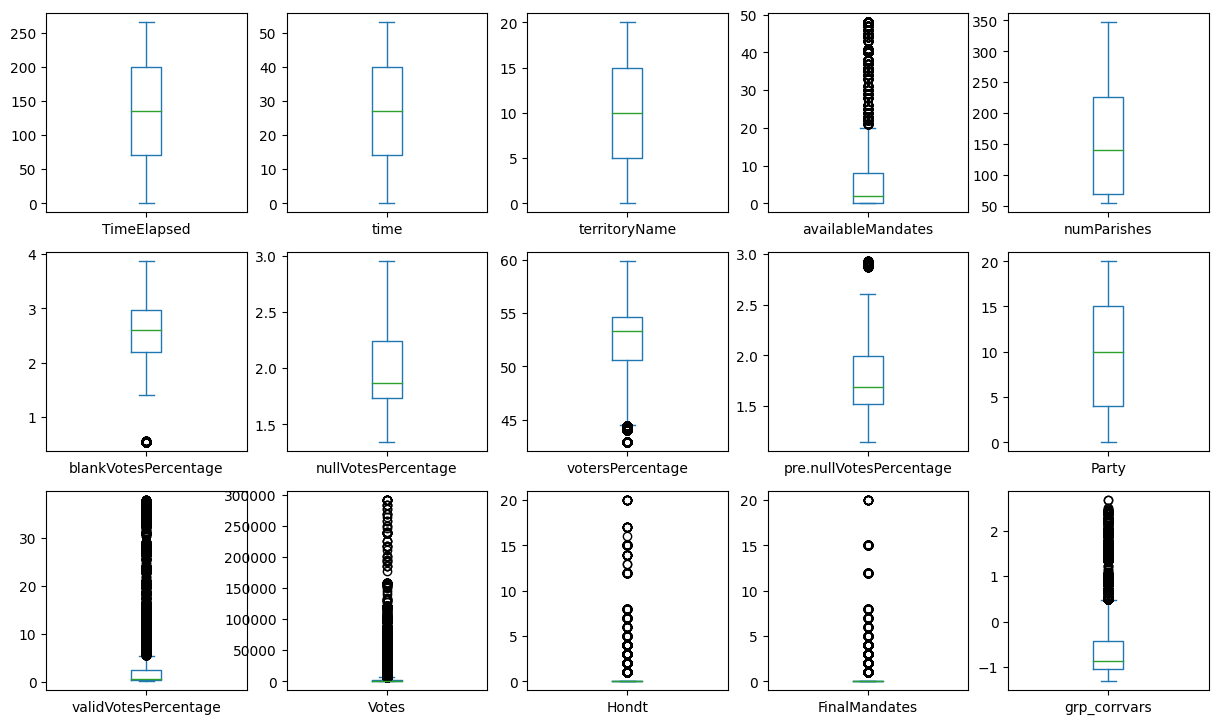

In [65]:
## Graficos Boxplot sin valores atipicos
df_data.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

In [66]:
print ("Tamaño actual del conjunto de datos:", df_data.shape)

Tamaño actual del conjunto de datos: (18344, 15)


## **Desarrollo de modelos**


### Separación de conjunto de datos: entrenamiento y pruebas



In [67]:
## Separación de conjunto de datos entre conjunto de entrenamiento y pruebas
X=df_data.drop(['FinalMandates'],axis=1)
y=df_data['FinalMandates']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)

### Selección de características

In [68]:
## Usando la funcion ExtraTreesClassifier se obtendran las diez características principales
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

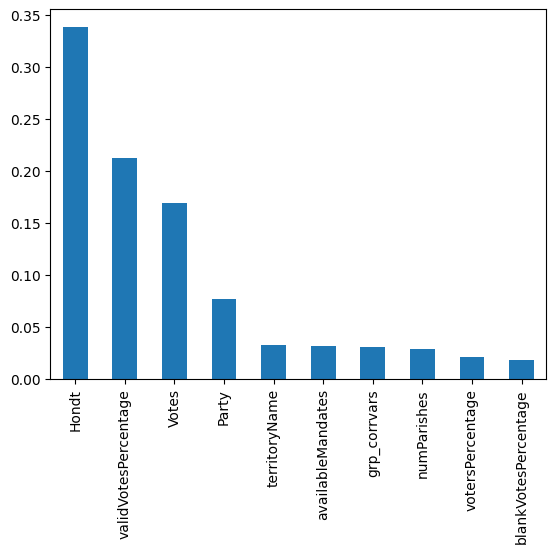

In [69]:
## Top 10 de catacteristicas por importancia
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

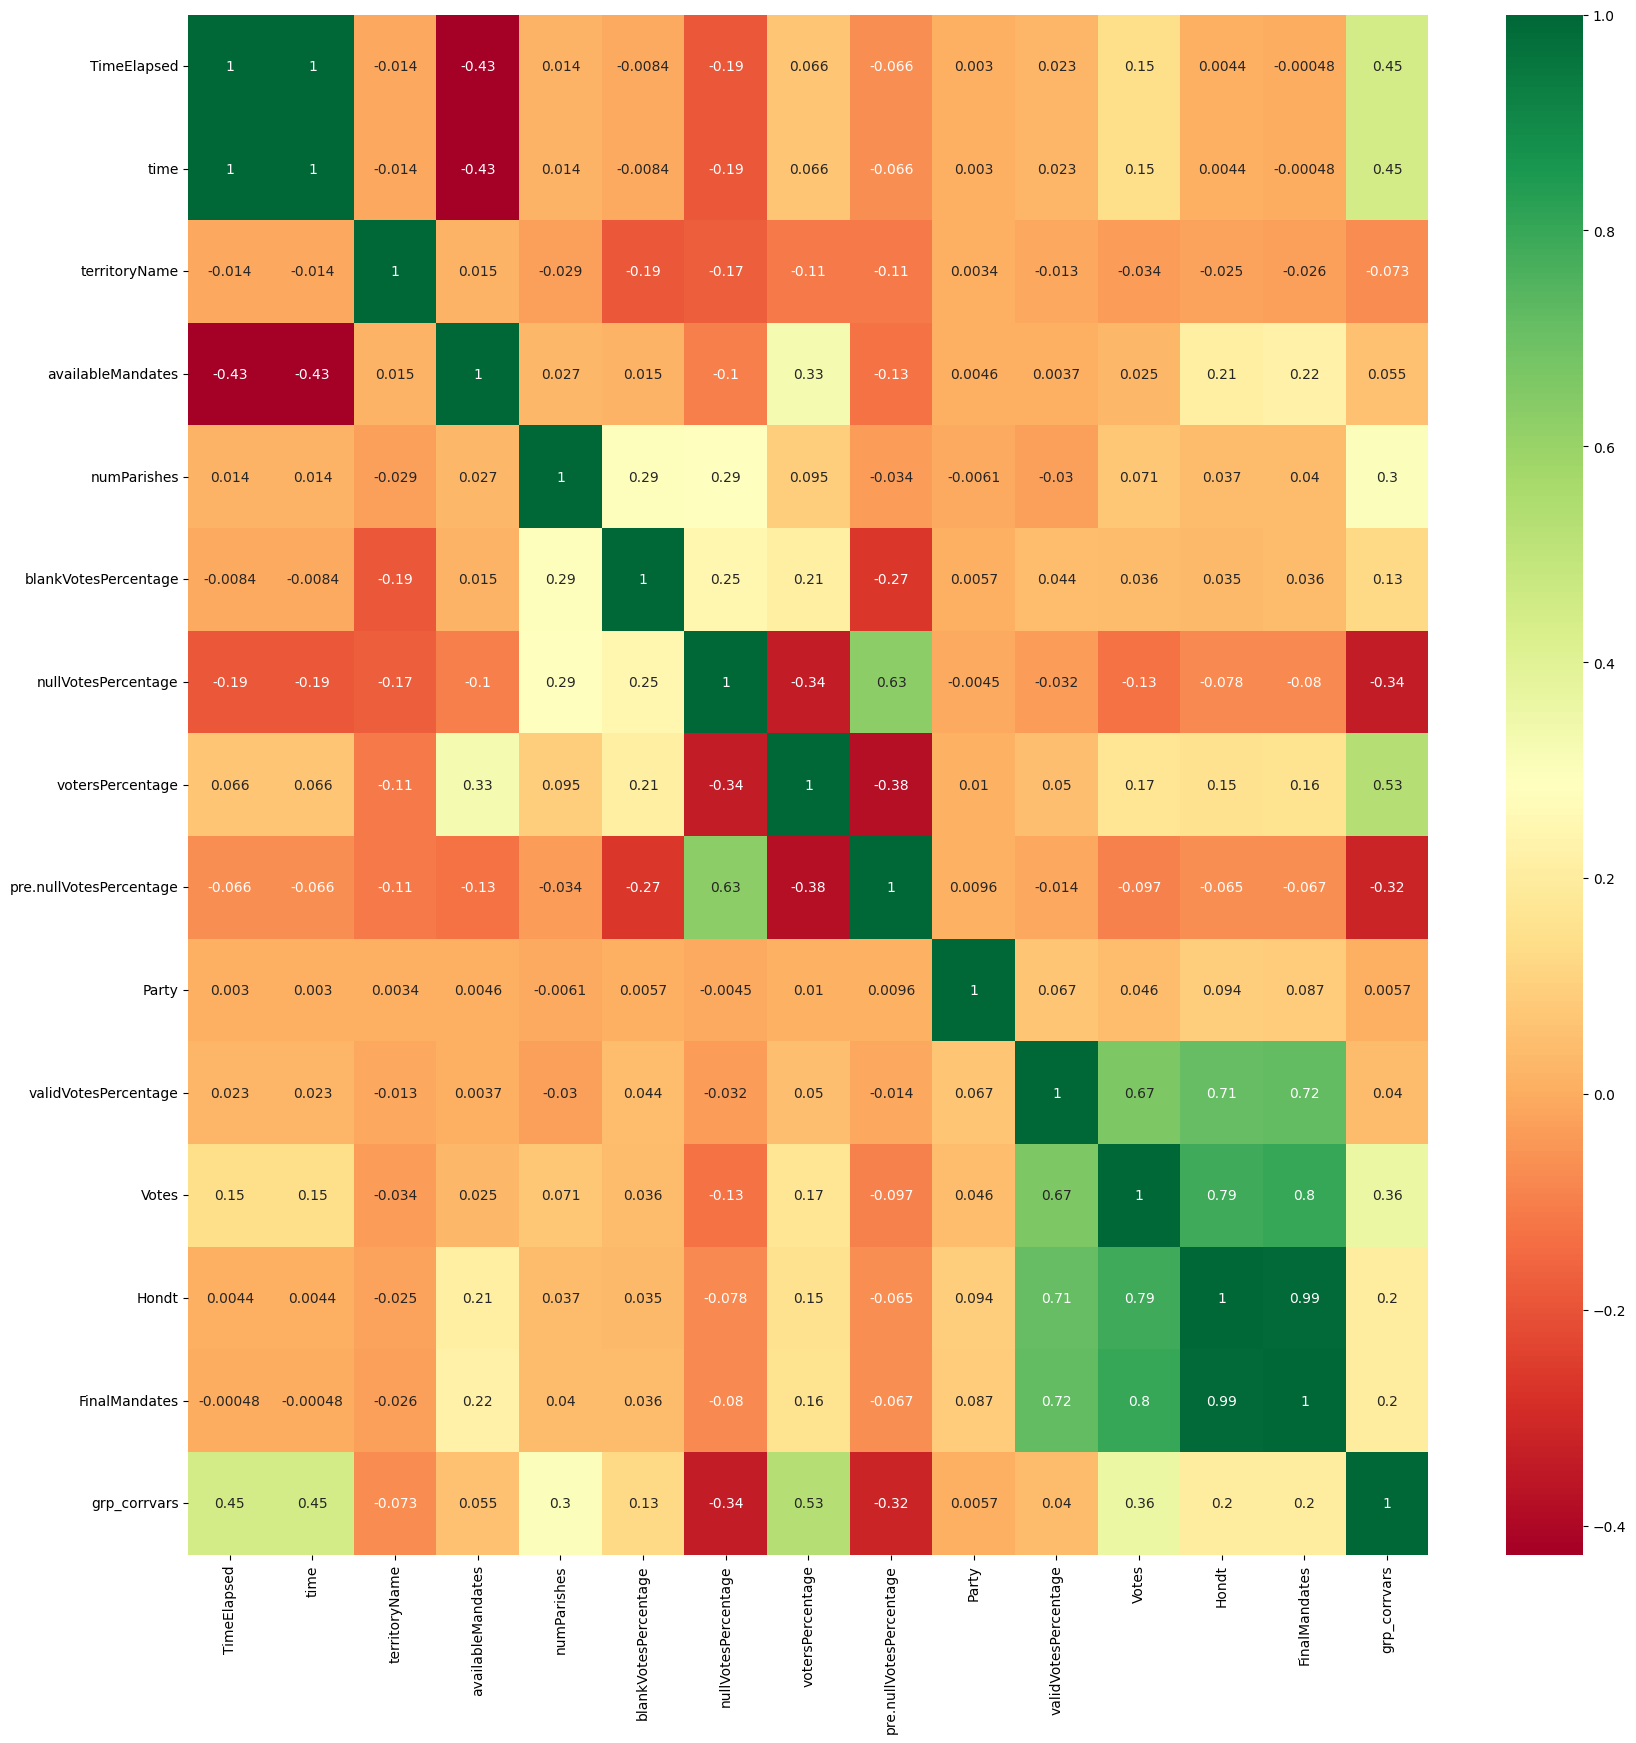

In [70]:
## Coeficientes de correlación de las 10 principales características
corrvars = df_data.corr()
top_features = corrvars.index
plt.figure(figsize=(20,20))

g=sns.heatmap(df_data[top_features].corr(),annot=True,cmap="RdYlGn")

### Modelo: Lineal Regression

In [71]:
print("MODELO: LINEAL REGRESSION")
lineal_regression = LinearRegression()

lineal_regression.fit(X_train,y_train)
scores_lr=lineal_regression.score(X_train,y_train)

predictions_lr=lineal_regression.predict(X_test)

print("Scores:", scores_lr)
print('RMSE:',np.sqrt(mean_squared_error(y_test,predictions_lr)))
print('R2 score:',r2_score(y_test,predictions_lr))


MODELO: LINEAL REGRESSION
Scores: 0.9852075012871052
RMSE: 0.16582100879993894
R2 score: 0.9890601025638103


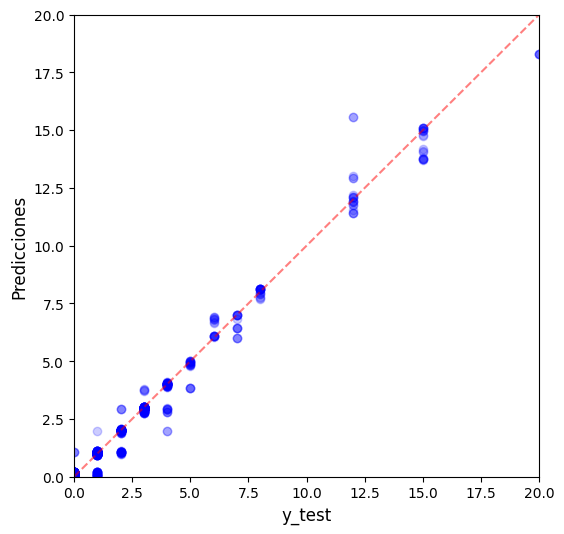

In [72]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,predictions_lr, marker= "o",color="blue",alpha=0.2)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('Predicciones', fontsize=12)
plt.plot([0,(np.max(y_test) + 5000)],[0,(np.max(y_test) + 5000)], 'r--', alpha=0.5)
plt.axis([0,20,0,20])
plt.show()

### Modelo: Decision Tree Regressor

In [73]:
print("MODELO: DECISION TREE REGRESSOR")
decision_tree_regressor = DecisionTreeRegressor(random_state = 0)

decision_tree_regressor.fit(X_train,y_train)
scores_dtr=decision_tree_regressor.score(X_train,y_train)

predictions_dtr=decision_tree_regressor.predict(X_test)


print("Scores:", scores_dtr)
print('RMSE:',np.sqrt(mean_squared_error(y_test,predictions_dtr)))
print('R2 score:',r2_score(y_test,predictions_dtr))

MODELO: DECISION TREE REGRESSOR
Scores: 1.0
RMSE: 0.013479096650429801
R2 score: 0.999927713746014


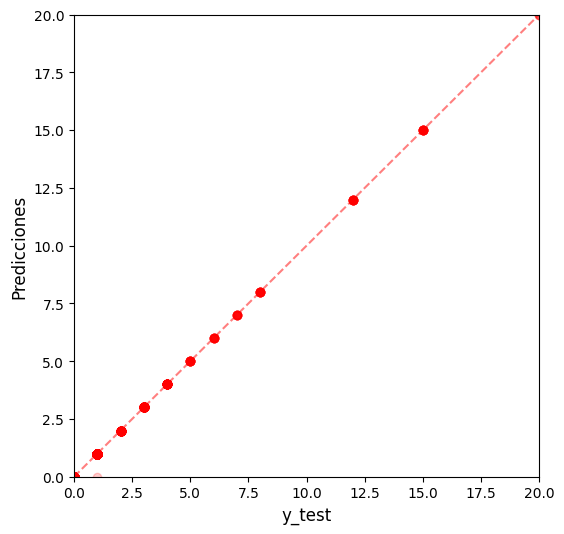

In [74]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,predictions_dtr, marker= "o",color="red",alpha=0.2)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('Predicciones', fontsize=12)
plt.plot([0,(np.max(y_test) + 5000)],[0,(np.max(y_test) + 5000)], 'r--', alpha=0.5)
plt.axis([0,20,0,20])
plt.show()

### Modelo: Random Forest Regressor

In [75]:
print("MODELO: RANDOM FOREST REGRESSOR")
rand_forest_regressor = RandomForestRegressor()

rand_forest_regressor.fit(X_train,y_train)
scores_rfr=rand_forest_regressor.score(X_train,y_train)

predictions_rfr=rand_forest_regressor.predict(X_test)


print("Scores:", scores_rfr)
print('RMSE:',np.sqrt(mean_squared_error(y_test,predictions_rfr)))
print('R2 score:',r2_score(y_test,predictions_rfr))

MODELO: RANDOM FOREST REGRESSOR
Scores: 0.9999154170145517
RMSE: 0.018375128539338415
R2 score: 0.9998656632255923


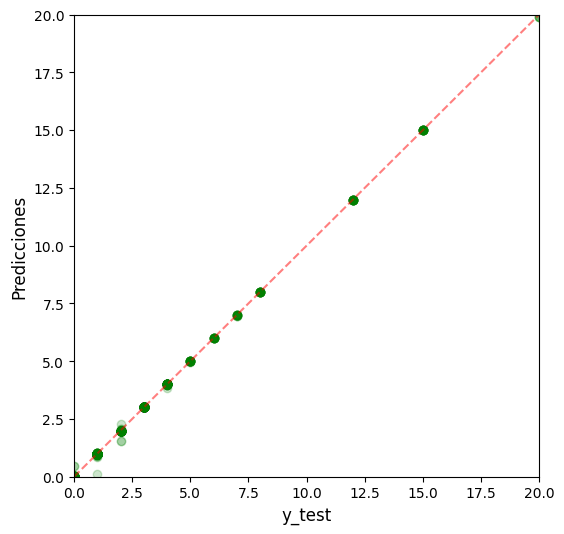

In [76]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,predictions_rfr, marker= "o",color="green",alpha=0.2)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('Predicciones', fontsize=12)
plt.plot([0,(np.max(y_test) + 5000)],[0,(np.max(y_test) + 5000)], 'r--', alpha=0.5)
plt.axis([0,20,0,20])
plt.show()

## **Conclusiones**



La precisión de los tres modelos es bastante alta destacando los modelos de Decision Tree y Random Forest sobre el modelo de Lineal Regressor.

Se evalua la posibilidad de agregar más valores al conjunto de datos y agregar o eliminar características al modelo para evaluar el desempeño.